## Clusterização Hierárquica na Prática

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data/tamanho_pinguins.csv')
data.sample(5)

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
140,Adelie,Dream,40.2,17.1,193.0,3400.0,FEMALE
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,FEMALE


In [3]:
# nesse caso iremos apenas apagar as linhas que possuem valores faltantes e outliers
data = data.dropna()
data = data[data.larg_bico_mm < 50]

In [4]:
data.shape

(333, 7)

In [5]:
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

C:\Users\paulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


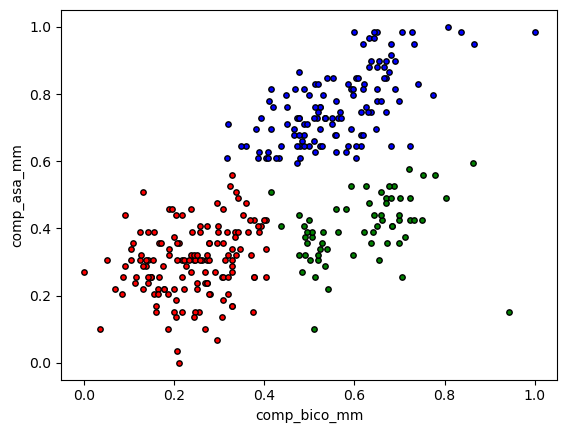

In [6]:
x = X_[:, [0,2]]
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(x)
labels = kmeans.labels_

plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="green", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], color="blue", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

In [7]:
# df_res = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
# df_res['cluster'] = labels

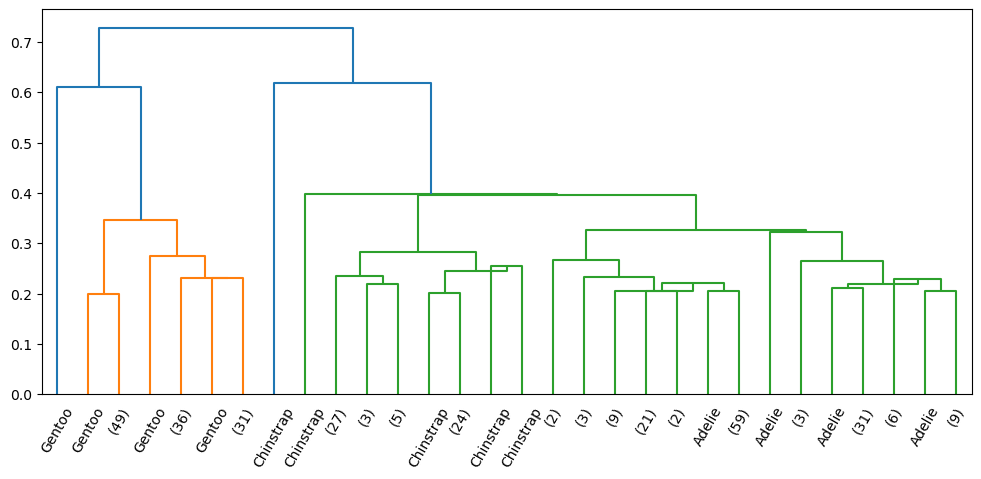

In [11]:
Z = linkage(X_, method='centroid')

plt.figure(figsize=(12,5))
dendrogram(Z,  truncate_mode='lastp', labels=list(data.especie),
           orientation='top',
           leaf_font_size=10,leaf_rotation=60,);

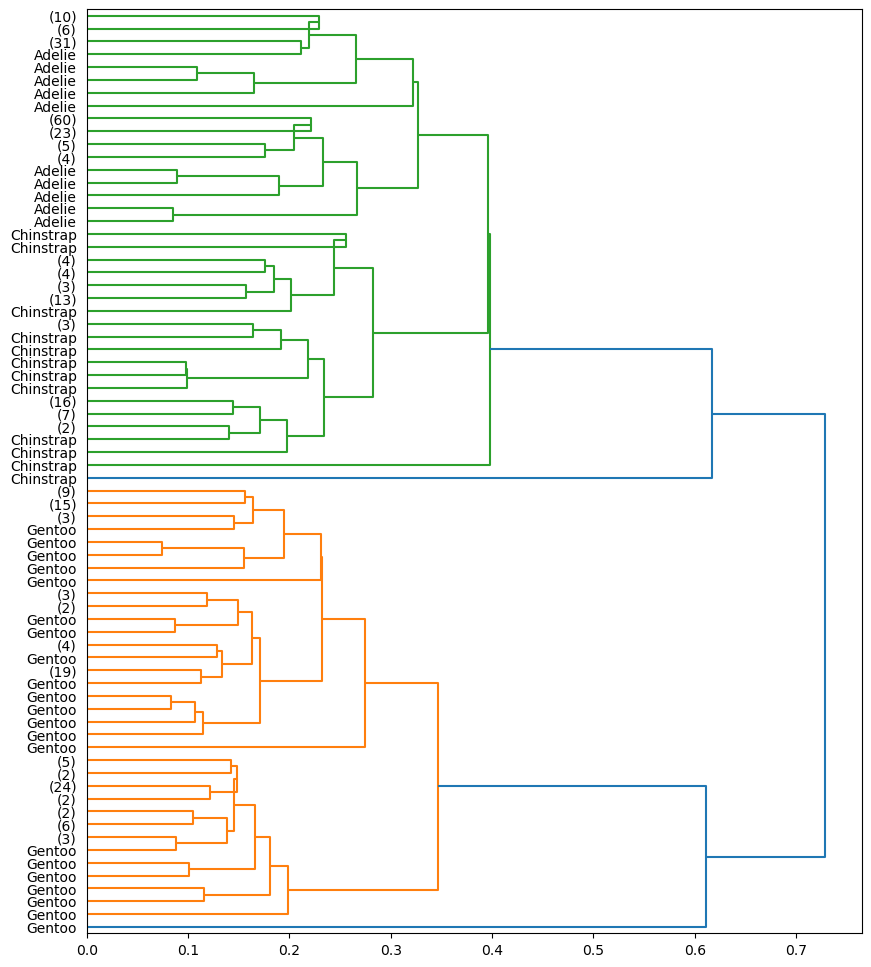

In [12]:
plt.figure(figsize=(10,12))
dendrogram(Z, p=8, truncate_mode='level', labels=list(data.especie),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [13]:
def k_means(data, k, threshhold=2):

    n = np.size(data, 0)
    
    # atribui os pontos a grupos aleatorios
    cluster_centers = np.random.choice(range(0, n), k)
    clustering = np.random.randint(0, k, n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    
    # enquanto a clusterização não converge ... 
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering

        # passo 1: Atribui pontos para os grupos
        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        clustering = np.argmin(cluster_distances, 1)

        # step 2: recalcula as médias
        # cluster_means deve ser um array k x d
        cluster_means = np.array([np.mean(data[clustering==c],0) for c in range(k)])
    return cluster_means, clustering

Base de Dados:
https://www.kaggle.com/datasets/fernandol/countries-of-the-world?datasetId=23752&sortBy=voteCount